In [43]:
import numpy as np
import pandas as pd
import sklearn
import copy
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import time
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Flight_Price_Dataset_Q2.csv')
df

,departure_time,stops,arrival_time,class,duration,days_left,price
0,Evening,zero,Night,Economy,2.17,1,5953
1,Early_Morning,zero,Morning,Economy,2.33,1,5953
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956
3,Morning,zero,Afternoon,Economy,2.25,1,5955
4,Morning,zero,Morning,Economy,2.33,1,5955
...,...,...,...,...,...,...,...
270133,Early_Morning,one,Night,Business,17.25,49,68739
270134,Morning,one,Evening,Business,10.08,49,69265
270135,Afternoon,one,Night,Business,10.42,49,77105
270136,Early_Morning,one,Evening,Business,10.00,49,81585


In [5]:
dummies_columns = ['class']
for dummy in dummies_columns:
    dummies = pd.get_dummies(df[dummy], drop_first=True).astype(int)
    df = pd.concat([df, dummies], axis='columns')
    df = df.drop([dummy], axis='columns')
    
df

,departure_time,stops,arrival_time,duration,days_left,price,Economy
0,Evening,zero,Night,2.17,1,5953,1
1,Early_Morning,zero,Morning,2.33,1,5953,1
2,Early_Morning,zero,Early_Morning,2.17,1,5956,1
3,Morning,zero,Afternoon,2.25,1,5955,1
4,Morning,zero,Morning,2.33,1,5955,1
...,...,...,...,...,...,...,...
270133,Early_Morning,one,Night,17.25,49,68739,0
270134,Morning,one,Evening,10.08,49,69265,0
270135,Afternoon,one,Night,10.42,49,77105,0
270136,Early_Morning,one,Evening,10.00,49,81585,0


In [7]:
time_mapping = {'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6}
df['departure_time'] = df['departure_time'].map(time_mapping)
df['arrival_time'] = df['arrival_time'].map(time_mapping)

stop_mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}
df['stops'] = df['stops'].map(stop_mapping)

df

,departure_time,stops,arrival_time,duration,days_left,price,Economy
0,4,0,5,2.17,1,5953,1
1,1,0,2,2.33,1,5953,1
2,1,0,1,2.17,1,5956,1
3,2,0,3,2.25,1,5955,1
4,2,0,2,2.33,1,5955,1
...,...,...,...,...,...,...,...
270133,1,1,5,17.25,49,68739,0
270134,2,1,4,10.08,49,69265,0
270135,3,1,5,10.42,49,77105,0
270136,1,1,4,10.00,49,81585,0


In [9]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df

,departure_time,stops,arrival_time,duration,days_left,price,Economy
0,0.798879,-2.320915,0.962015,-1.397233,-1.843752,-0.658203,0.672585
1,-1.318820,-2.320915,-1.257371,-1.374997,-1.843752,-0.658203,0.672585
2,-1.318820,-2.320915,-1.997166,-1.397233,-1.843752,-0.658071,0.672585
3,-0.612920,-2.320915,-0.517576,-1.386115,-1.843752,-0.658115,0.672585
4,-0.612920,-2.320915,-1.257371,-1.374997,-1.843752,-0.658115,0.672585
...,...,...,...,...,...,...,...
270133,-1.318820,0.191205,0.962015,0.698512,1.696330,2.108062,-1.486801
270134,-0.612920,0.191205,0.222219,-0.297940,1.696330,2.131237,-1.486801
270135,0.092980,0.191205,0.962015,-0.250688,1.696330,2.476657,-1.486801
270136,-1.318820,0.191205,0.222219,-0.309058,1.696330,2.674039,-1.486801


In [11]:
df_x = df.drop('price', axis = 'columns')
x = df_x.values
y = df['price'].values

print(x)
print(y)

[[ 0.79887937 -2.32091473  0.96201457 -1.3972332  -1.84375236  0.67258491]
 [-1.31881992 -2.32091473 -1.25737064 -1.37499717 -1.84375236  0.67258491]
 [-1.31881992 -2.32091473 -1.99716571 -1.3972332  -1.84375236  0.67258491]
 ...
 [ 0.09297961  0.19120483  0.96201457 -0.25068809  1.69633028 -1.48680113]
 [-1.31881992  0.19120483  0.2222195  -0.30905766  1.69633028 -1.48680113]
 [-0.61292016  0.19120483  0.2222195  -0.29793964  1.69633028 -1.48680113]]
[-0.65820293 -0.65820293 -0.65807075 ...  2.47665663  2.67403929
  2.67403929]


In [13]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size = 0.2,random_state = 42, shuffle = True)

In [22]:
# Create an instance of the LinearRegression model
regr = LinearRegression()

# Fit the model on the training data
regr.fit(x_train, y_train)

# Predict the target variable for the test data
predicted = regr.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, predicted)
print("Mean Squared Error:", mse)

# Calculate the R-squared score
r2 = r2_score(y_test, predicted)
print("R-squared Score:", r2)

print("score : ", regr.score(x_train, y_train))

# Retrieve the coefficients and intercept
coefficients = regr.coef_
intercept = regr.intercept_

#Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Mean Squared Error: 0.09869934278300349
R-squared Score: 0.9014883317441093
score :  0.9003725499561815
Coefficients: [-0.00228547  0.10545641  0.01780882  0.02479779 -0.07814626 -0.93352161]
Intercept: 6.575439041426348e-05


In [24]:
def compute_f(x, w, b):
    f_wb_i = np.dot(x, w) + b
    return f_wb_i

In [26]:
def compute_cost(X, w, b, Y):
    m = len(X)
    error = 0.0
    for i in range(m):
        error += ((compute_f(X[i], w, b) - Y[i]) ** 2)
    error_w = 0.0
    for j in range(len(w)):
        error_w += w[j] ** 2
    j = error / (2 * m) + ((1 / (2 * m)) * error_w)
    return j

In [28]:
def compute_gradient(X, w, b, Y):
    m = len(X)
    n = len(X[0])
    dj_dw = np.zeros((n,))
    dj_db = 0
    for i in range(m):
        err = compute_f(X[i], w, b) - Y[i]
        for j in range(n):
            dj_dw[j] += (err * X[i,j])
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

In [34]:
def compute_gradient_descent(X, Y, w_in, b_in, alpha, num_iterations):
    b = b_in
    w = copy.deepcopy(w_in)

    J_history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradient(X, w, b, Y)

        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        cost = compute_cost(X, w, b, Y)
        J_history.append(cost)

        if i % math.ceil(num_iterations / 10) == 0:
            print("iteration: ", i + 1, "   cost: ", cost)

    return J_history, w, b

In [36]:
initial_w = np.zeros(len(x[0]))
initial_b = 0
alpha = 0.1
num_itr = 100

J_his, w, b = compute_gradient_descent(x_train, y_train, initial_w, initial_b, alpha, num_itr)
print("w: ", w, "   b: ", b)

iteration:  1    cost:  0.41051483810317557
iteration:  11    cost:  0.09327101906799869
iteration:  21    cost:  0.05595574522078543
iteration:  31    cost:  0.050890862160735906
iteration:  41    cost:  0.05005789285085203
iteration:  51    cost:  0.04987526683139764
iteration:  61    cost:  0.04982194407504584
iteration:  71    cost:  0.04980339932712007
iteration:  81    cost:  0.0497964452773675
iteration:  91    cost:  0.04979376564484119
w:  [-0.00266328  0.10430895  0.01811582  0.0260405  -0.07808318 -0.93321417]    b:  6.465940347251323e-05


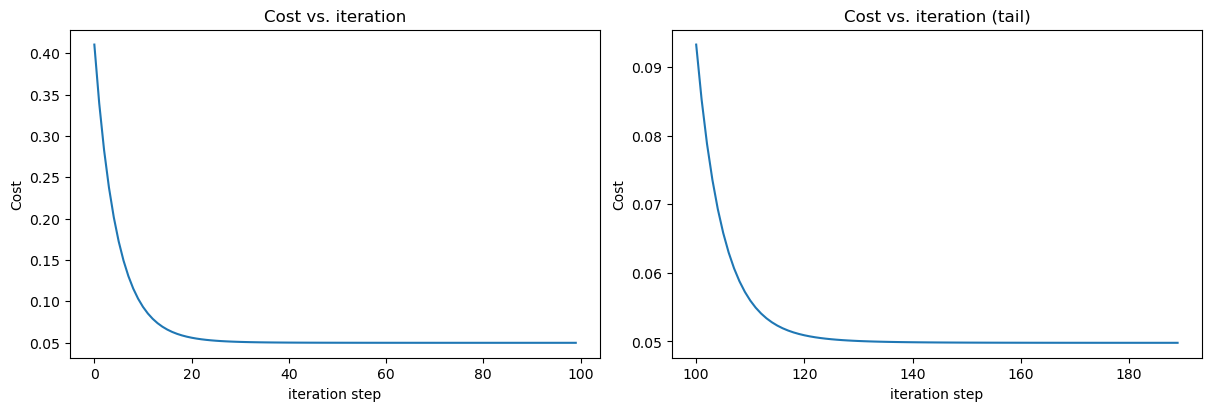

In [51]:
np.set_printoptions(precision=2)

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_his)
ax2.plot(100 + np.arange(len(J_his[10:])), J_his[10:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()